# Задание №1:
Любая программа, использующая параллельные вычисления, имеет смысл только если она работает быстрее, чем программа, делающая тоже самое, но последовательно. Так что замерять время выполнения крайне важно. Прежде, чем замерять время работы параллельных программ, надо научится правильно замерять время работы последовательных программ. В Julia задача облегчается наличием готовых функций и макросов для этих целей.

* Напишите простейшую подпрограмму, которая ждет некоторое время, например 1 секунду. Для ожидания используете встроенную функцию sleep. Можно ли передавать ей дробные значения? Прочтите справку функции ```time_ns``` и замените ею функцию ```sleep```.

In [2]:
function normal_sleep(seconds)
    sleep(seconds) # second должно быть не меньше 1 миллисекунды или 0,001 секунды
end

normal_sleep (generic function with 1 method)

In [3]:
# Ждем 1 секунды
normal_sleep(1)

In [4]:
# Ждем 10 секунды
normal_sleep(10)

In [5]:
# Ждем 0.001(дробные значения) секунды
normal_sleep(0.001)

* Замерьте время работы функции 10 раз, распечатывая результаты. Используйте @time. Время выполнения рознится или все время одинаковое?


In [6]:
# использование @time
@time normal_sleep(0.001)
@time normal_sleep(1)
@time normal_sleep(10)

  0.016308 seconds (9 allocations: 240 bytes)


  1.006807 seconds (116.58 k allocations: 6.597 MiB, 11.36% compilation time)


 10.011199 seconds (353 allocations: 13.422 KiB)


In [7]:
# использование @timed для меньшего измерения времени и лучшего отображения
    for i in 1:9
        sleeping_time = 1 / (10^(i))
        println("sleeping_time= $sleeping_time seconds => execution time = ", (@timed normal_sleep(sleeping_time)).time)
    end

sleeping_time= 0.1 seconds => execution time = 0.1168786
sleeping_time= 0.01 seconds => execution time = 0.0197191


sleeping_time= 0.001 seconds => execution time = 0.0158588
sleeping_time= 0.0001 seconds => execution time = 0.0150336
sleeping_time= 1.0e-5 seconds => execution time = 0.0158371
sleeping_time= 1.0e-6 seconds => execution time = 0.0022372
sleeping_time= 1.0e-7 seconds => execution time = 0.0153273
sleeping_time= 1.0e-8 seconds => execution time = 0.0144733
sleeping_time= 1.0e-9 seconds => execution time = 0.0147732


Функция ```time_ns```

In [11]:
function time_ns_sleep(second)
    starter = time_ns()
    while (time_ns() - starter) < (second*1e9)
        # do nothing, just wait!
        # elapsed time
    end
end

time_ns_sleep (generic function with 1 method)

In [12]:
@time time_ns_sleep(1)
@time time_ns_sleep(0.001)
@time time_ns_sleep(0.0001)
@time time_ns_sleep(0.00001)
@time time_ns_sleep(0.000001)
@time time_ns_sleep(0.0000001)
@time time_ns_sleep(0.00000001)
@time time_ns_sleep(0.000000001)

  1.000002 seconds
  0.001001 seconds
  0.000100 seconds
  0.000010 seconds
  0.000001 seconds
  0.000000 seconds
  0.000000 seconds
  0.000000 seconds


In [13]:
#using @timed for smaller time measurement and better display
    for i in 1:9
        sleeping_time = 1 / (10^(i))
        println("sleeping_time= $sleeping_time seconds => execution time = ", (@timed time_ns_sleep(sleeping_time)).time)
    end

sleeping_time= 0.1 seconds => execution time = 0.1000002
sleeping_time= 0.01 seconds => execution time = 0.01
sleeping_time= 0.001 seconds => execution time = 0.001
sleeping_time= 0.0001 seconds => execution time = 0.0001
sleeping_time= 1.0e-5 seconds => execution time = 1.0e-5
sleeping_time= 1.0e-6 seconds => execution time = 1.1e-6
sleeping_time= 1.0e-7 seconds => execution time = 1.0e-7
sleeping_time= 1.0e-8 seconds => execution time = 1.0e-7
sleeping_time= 1.0e-9 seconds => execution time = 2.0e-7


In [15]:
for i in 1:10
    println("Run $i")
    @time time_ns_sleep(1e-5)
end

Run 1
  0.000019 seconds
Run 2
  0.000010 seconds
Run 3
  0.000010 seconds
Run 4
  0.000010 seconds
Run 5
  0.000010 seconds
Run 6
  0.000010 seconds
Run 7
  0.000010 seconds
Run 8
  0.000010 seconds
Run 9
  0.000010 seconds
Run 10
  0.000010 seconds


* Сделайте замеры времени для 10^6 запусков. Ждать одну секунду уже не получится, поэтому замените ```sleep``` на ```time_ns```. Замерьте время работы программы, распечатайте в виде облака точек (scatter) и гистограммы.
Для замеров времени можно использовать ```BenchmarkTools```, который может строить гистограммы времени работы функций, но нужно разобраться как он работает.

In [16]:
measureds = []
measurements = []
function get_time()
    # test a routine that sleep for 1 microsecond.
    # 1e-6 = 0.000001 second
    return (@timed time_ns_sleep(1e-6)).time 
end

N = Integer(1e6)

for i in 1:N
    push!(measureds, get_time())
    push!(measurements, i)
end

In [17]:
# data cleansing
using Statistics;
mean_ = mean(measureds)
for i in 1:N
    if abs(measureds[i] - mean_) > 0.5e-5
        measureds[i] = mean_ + 0.5e-5
    end
end

In [20]:
using Plots;
gr(size=(1000, 600))
scatter(measurements, measureds, label="measured execution time", ms=0.4, ma=0.7, color="blue")
xlabel!("Order of launches")
ylabel!("Measured execution time")
title!("scatter plot of execution time over $N launches")
savefig("Scatter.png")

"d:\\work\\study\\2023-2024\\Параллельное программирование\\lab01\\Scatter.png"

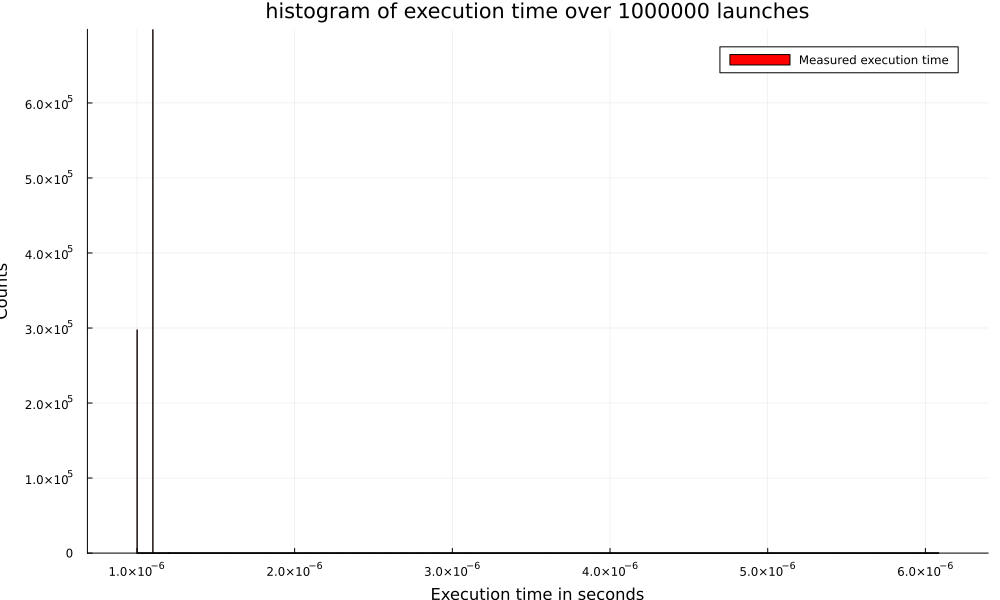

In [23]:
histogram(measureds, label="Measured execution time", color="red")
xlabel!("Execution time in seconds")
ylabel!("Counts")
title!("histogram of execution time over $N launches")
#savefig("Histogram.png")

In [25]:
import Pkg; Pkg.add("BenchmarkTools")

   Resolving package versions...


    Updating `C:\Users\Reachna\.julia\environments\v1.6\Project.toml`
  [6e4b80f9] + BenchmarkTools v1.3.2
    Updating `C:\Users\Reachna\.julia\environments\v1.6\Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.3.2
  [9abbd945] + Profile


Precompiling

 project...


  ✓ BenchmarkTools
  1 dependency successfully precompiled in 5 seconds (138 already precompiled)


In [26]:
using BenchmarkTools;
using Plots;
benchmark = @benchmarkable time_ns_sleep(1e-6) evals= 1e6
run(benchmark)

BenchmarkTools.Trial: 5 samples with 1000000 evaluations.
 Range (min … max):  1.007 μs … 1.009 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.007 μs             ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.007 μs ± 0.659 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █            █      █    █                              █  
  █▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁█▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1.01 μs        Histogram: frequency by time       1.01 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [ ]:
# data cleansing
using Statistics;
mean_ = mean(measureds)
for i in 1:N
    if abs(measureds[i] - mean_) > 0.5e-5
        measureds[i] = mean_ + 0.5e-5
    end
end